In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Spotify
ticker = "SPOT"

# Fetch data for the last 5 years
data = yf.download(ticker, period="5y")

# Ensure the index is timezone-unaware
data.index = data.index.tz_localize(None)

# Save the data to an Excel file
output_file = "Spotify_Stock_Data.xlsx"
data.to_excel(output_file)

print(f"Data for {ticker} saved to {output_file}")



[*********************100%***********************]  1 of 1 completed


Data for SPOT saved to Spotify_Stock_Data.xlsx


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from Excel files


In [8]:
djia_data = pd.read_excel("DJIA.xlsx")
stock_data = pd.read_excel("stock.xlsx")

In [9]:
print("DJIA Data:")
print(djia_data.info())
print(djia_data.head())

print("\nStock Data:")
print(stock_data.info())
print(stock_data.head())


DJIA Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1306 non-null   datetime64[ns]
 1   DJIA              1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB
None
  observation_date      DJIA
0       2019-11-27  28164.00
1       2019-11-28       NaN
2       2019-11-29  28051.41
3       2019-12-02  27783.04
4       2019-12-03  27502.81

Stock Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1261 non-null   object
 1   Adj Close  1260 non-null   object
 2   Close      1260 non-null   object
 3   High       1260 non-null   object
 4   Low        1260 non-null   object
 5   Open       1260 non-null   obje

In [10]:
# Clean DJIA Data
djia_data_clean = djia_data.dropna(subset=["DJIA"])  # Drop rows with NaN in DJIA
djia_data_clean["observation_date"] = pd.to_datetime(djia_data_clean["observation_date"])

# Clean Stock Data
stock_data_clean = stock_data.iloc[2:].copy()  # Remove first two metadata rows
stock_data_clean.columns = ["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"]
stock_data_clean["Date"] = pd.to_datetime(stock_data_clean["Date"])
numeric_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]

for col in numeric_cols:
    stock_data_clean[col] = pd.to_numeric(stock_data_clean[col], errors="coerce")  # Convert to float

# Drop any remaining rows with NaN
stock_data_clean = stock_data_clean.dropna()

# Merge datasets on Date
merged_data = pd.merge(
    djia_data_clean.rename(columns={"observation_date": "Date"}),
    stock_data_clean,
    on="Date",
    suffixes=("_DJIA", "_Stock")
)

print("\nCleaned and Merged Data:")
print(merged_data.info())
print(merged_data.head())


Cleaned and Merged Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   DJIA       1258 non-null   float64       
 2   Adj Close  1258 non-null   float64       
 3   Close      1258 non-null   float64       
 4   High       1258 non-null   float64       
 5   Low        1258 non-null   float64       
 6   Open       1258 non-null   float64       
 7   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 78.8 KB
None
        Date      DJIA   Adj Close       Close        High         Low  \
0 2019-11-29  28051.41  142.550003  142.550003  143.229996  141.593994   
1 2019-12-02  27783.04  142.529999  142.529999  143.470001  141.479996   
2 2019-12-03  27502.81  143.979996  143.979996  144.149994  140.009995   
3 2019-12-04  27649.78  144

<ipython-input-10-907955ff59c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djia_data_clean["observation_date"] = pd.to_datetime(djia_data_clean["observation_date"])


<ipython-input-15-bd9e7d1aff03>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



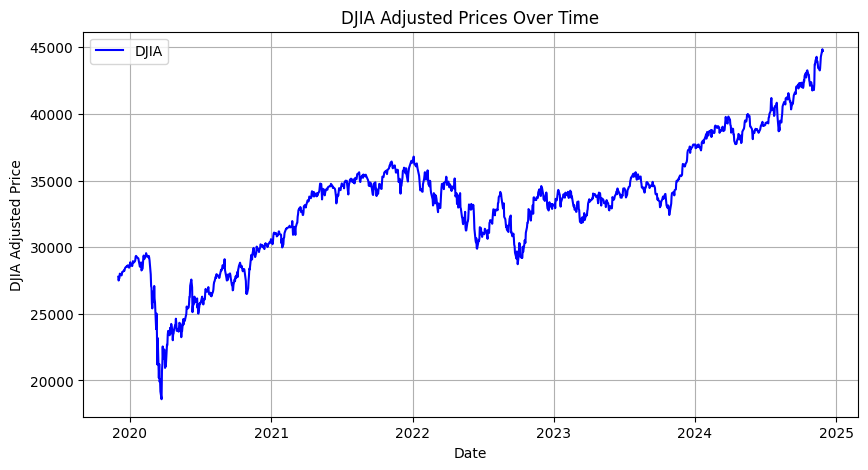

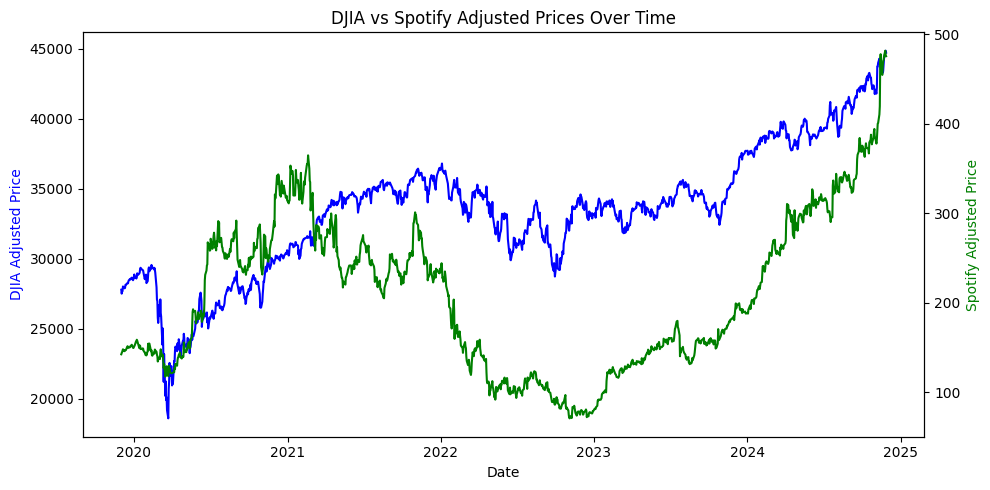

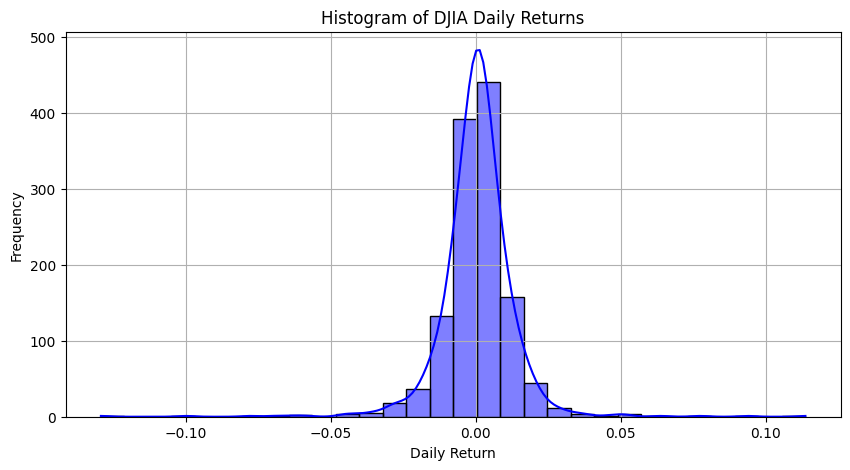

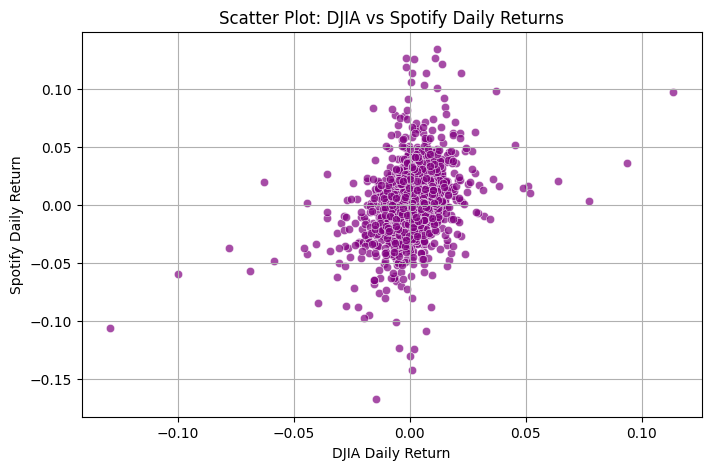


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 1 to 1257
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1257 non-null   datetime64[ns]
 1   DJIA          1257 non-null   float64       
 2   Adj Close     1257 non-null   float64       
 3   Close         1257 non-null   float64       
 4   High          1257 non-null   float64       
 5   Low           1257 non-null   float64       
 6   Open          1257 non-null   float64       
 7   Volume        1257 non-null   int64         
 8   DJIA_Return   1257 non-null   float64       
 9   Stock_Return  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 108.0 KB
None

First Few Rows of Merged Data:
        Date      DJIA   Adj Close       Close        High         Low  \
1 2019-12-02  27783.04  142.529999  142.529999  143.470001  141.479996   
2 2019-12-03  27502.8

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
djia_data = pd.read_excel("Satya_Panda_DJIA.xlsx")
stock_data = pd.read_excel("Satya_Panda_Spotify.xlsx")

# Clean DJIA Data
djia_data_clean = djia_data.dropna(subset=["DJIA"])  # Drop rows with NaN in DJIA
djia_data_clean["observation_date"] = pd.to_datetime(djia_data_clean["observation_date"])

# Clean Stock Data
stock_data_clean = stock_data.iloc[2:].copy()  # Remove first two metadata rows
stock_data_clean.columns = ["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"]
stock_data_clean["Date"] = pd.to_datetime(stock_data_clean["Date"])
numeric_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]

for col in numeric_cols:
    stock_data_clean[col] = pd.to_numeric(stock_data_clean[col], errors="coerce")  # Convert to float

# Drop any remaining rows with NaN
stock_data_clean = stock_data_clean.dropna()

# Merge datasets on Date
merged_data = pd.merge(
    djia_data_clean.rename(columns={"observation_date": "Date"}),
    stock_data_clean,
    on="Date",
    suffixes=("_DJIA", "_Stock")
)

# Calculate Daily Returns
merged_data["DJIA_Return"] = merged_data["DJIA"].pct_change()  # Daily return for DJIA
merged_data["Stock_Return"] = merged_data["Adj Close"].pct_change()  # Daily return for stock

# Drop NA values introduced by returns calculation
merged_data = merged_data.dropna()

# Task 1: Line Chart for DJIA Adjusted Prices
plt.figure(figsize=(10, 5))
plt.plot(merged_data["Date"], merged_data["DJIA"], label="DJIA", color="blue")
plt.title("DJIA Adjusted Prices Over Time")
plt.xlabel("Date")
plt.ylabel("DJIA Adjusted Price")
plt.legend()
plt.grid()
plt.show()

# Task 2: Line Chart with Dual Y-Axis
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(merged_data["Date"], merged_data["DJIA"], label="DJIA", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("DJIA Adjusted Price", color="blue")

ax2 = ax1.twinx()
ax2.plot(merged_data["Date"], merged_data["Adj Close"], label="Stock", color="green")
ax2.set_ylabel("Spotify Adjusted Price", color="green")
plt.title("DJIA vs Spotify Adjusted Prices Over Time")
fig.tight_layout()
plt.show()

# Task 3: Histogram of DJIA Daily Returns
plt.figure(figsize=(10, 5))
sns.histplot(merged_data["DJIA_Return"], kde=True, color="blue", bins=30)
plt.title("Histogram of DJIA Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Task 4: Scatter Plot of DJIA vs Spotify Daily Returns
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_data["DJIA_Return"], y=merged_data["Stock_Return"], color="purple", alpha=0.7)
plt.title("Scatter Plot: DJIA vs Spotify Daily Returns")
plt.xlabel("DJIA Daily Return")
plt.ylabel("Spotify Daily Return")
plt.grid()
plt.show()

# Summary of Final Dataset
print("\nFinal Dataset Info:")
print(merged_data.info())
print("\nFirst Few Rows of Merged Data:")
print(merged_data.head())


In [16]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create an interactive time-series line chart (Dygraph style)
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add DJIA adjusted price as the primary y-axis
fig.add_trace(
    go.Scatter(
        x=merged_data["Date"],
        y=merged_data["DJIA"],
        name="DJIA Adjusted Price",
        mode="lines",
        line=dict(color="blue")
    ),
    secondary_y=False
)

# Add Stock adjusted price as the secondary y-axis
fig.add_trace(
    go.Scatter(
        x=merged_data["Date"],
        y=merged_data["Adj Close"],
        name="Spotify Adjusted Price",
        mode="lines",
        line=dict(color="green")
    ),
    secondary_y=True
)

# Update layout for better interactivity and appearance
fig.update_layout(
    title="Interactive Dygraph: DJIA vs Spotify Adjusted Prices",
    xaxis_title="Date",
    yaxis_title="DJIA Adjusted Price",
    legend_title="Legend",
    template="plotly_white",
    hovermode="x unified"
)

# Set secondary y-axis title
fig.update_yaxes(title_text="Spotify Stock Adjusted Price", secondary_y=True)

# Show the interactive plot
fig.show()
